In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.special import erf

## Exact response theory on a two-level system

Let us simulate the exact response of a two-level system to a weak external electromagnetic perturbation.
The Hamiltonian for the unperturbed system is diagonal with two diagonal entries, $E_a$ and $E_b$, the former
smaller than the latter.

We then propagate the system explicitly by integrating the time-dependent Schrödinger equation
$$
i \hbar \frac{\partial}{\partial t} \Psi(t) = \hat{H} \Psi(t)
$$

Within the dipole approximation (valid for electromagnetic frequencies in the UV/Vis range or lower),
the perturbing electromagnetic radiation is simply represented by an oscillating electric field (the magnetic field
comes in at second-order, that is, in the quadrupole approximation, where the electric field is represented by
dipole and quadrupole, and the magnetic field by the dipole) given by
$$
F(t) = F^\omega \sin(\omega t) \times \text{erf}(at)
$$
Here, $\omega$ is the frequency of the incoming radiation in atomic units, and it is called _resonant_
if it matches the energy difference $E_b - E_a$ between the two states. The error function and the
parameter $a$ are used to slowly switch on the perturbation, while $F^\omega$ is the amplitude of the
electric field. Remember that increasing the frequency of the radiation, means increasing the energy
carried by each photon (the energy of the laser), while increasing the amplitude roughly means increasing
the number of incident photons per unit of time (the power/intensity of the laser).
The full, time-dependent Hamiltonian in the electric dipole approximation is thus given by
$$
\hat{H}(t) = \hat{H}_0 - \hat{\mu}F(t)
$$


In [21]:
# time
dt = 0.1
tmax = 500
t = np.arange(0, tmax, dt)
n = len(t)

# external electric field
# Fw = 0.00005
Fw = 0.2
# Fw = 0.0
w = 0.1
F = Fw * np.sin(w * t) * erf(0.01 * t)

# time-dependent wave function
psi = np.zeros((2,n), dtype=complex)
# psi[:,0] = [1.0/np.sqrt(2.0), 1.0/np.sqrt(2.0)]
psi[:,0] = [1.0, 0.0]

# energy levels
Ea = 1.0
Eb = 1.5

# transition dipole moment
muab = 1.0
muba = muab

# Hamiltonian and dipole moment operators
H0 = np.array([[Ea, 0], [0, Eb]])
mu = np.array([[0, muab],[muba, 0]])
V = -mu

# time-dependent dipole moment (polarization)
P = np.zeros(n, dtype=float)
P[0] = np.dot(psi[:,0], np.matmul(mu, psi[:,0])).real

In [22]:
# time propagation
for k in range(1,n):
    psi[:,k] = np.matmul(expm(-1j * (H0 + V * F[k-1]) * dt), psi[:,k-1])
    P[k] = np.dot(np.conjugate(psi[:,k]), np.matmul(mu, psi[:,k])).real

In [23]:
# population of states

pop = np.zeros_like(psi)
pop[0,:] = np.conj(psi[0,:])*psi[0,:]
pop[1,:] = np.conj(psi[1,:])*psi[1,:]

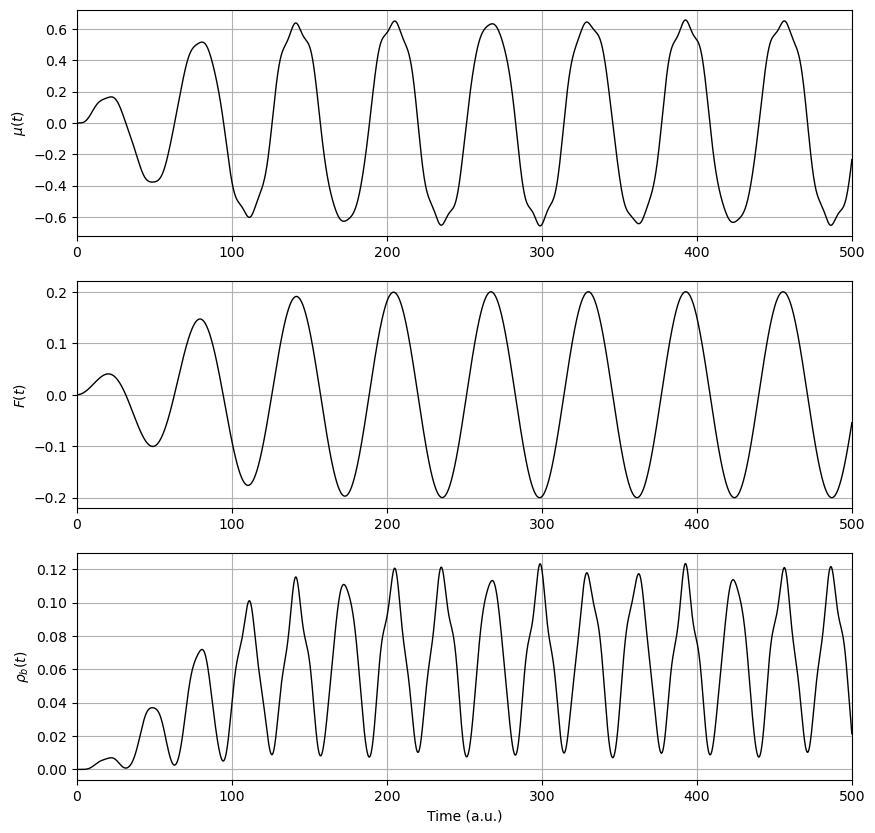

In [24]:
# plot observables
fig = plt.figure(figsize=(10,10))

ax = plt.subplot(3, 1, 1, xlim=(0,tmax))
plt.plot(t, P, 'k-', linewidth=1)
plt.grid(True)
plt.ylabel(r'$\mu(t)$')

ax = plt.subplot(3, 1, 2, xlim=(0,tmax))
plt.plot(t, F, 'k-', linewidth=1)
plt.grid(True)
plt.ylabel(r'$F(t)$')

ax = plt.subplot(3, 1, 3, xlim=(0,tmax))
plt.plot(t, pop[1,:], 'k-', linewidth=1)
plt.grid(True)
plt.ylabel(r'$\rho_b(t)$')

plt.xlabel('Time (a.u.)')

plt.show()